In [3]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [29]:
dataframe=pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [31]:
df=dataframe

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [35]:
df = df[['ORDERLINENUMBER', 'SALES']]

In [37]:
df.isna().sum()

ORDERLINENUMBER    0
SALES              0
dtype: int64

In [39]:
# Standard Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

# This tries to make the Mean 0 and the Standard Deviation as 1

In [41]:
scaled_values

array([[-1.05705871, -0.37082523],
       [-0.34701507, -0.42789707],
       [-1.05705871,  0.17944282],
       ...,
       [-0.58369628,  1.01202368],
       [-1.29373992, -0.78072155],
       [ 0.59970978, -0.25763729]])

In [43]:
# Import KMeansClustering

from sklearn.cluster import KMeans

In [45]:
# Finding k with the Elbow Method

# Within Cluster Sum of Squares of Distances
wcss = [] 

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

# The inertia is computed as the sum of squared distances from each data point to the center of its assigned cluster 

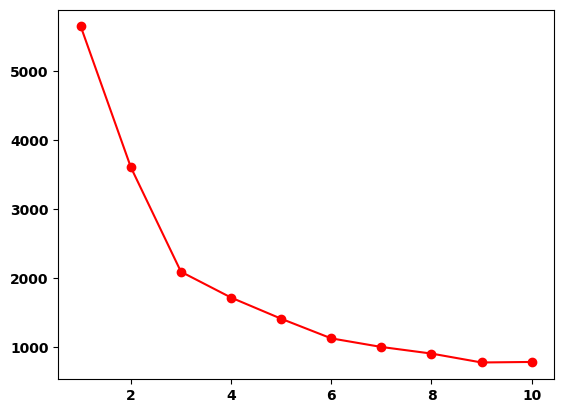

In [47]:
# Plot the Elbow Plot
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss,'ro-')
plt.show()

In [73]:
# K = 3seems to be a better choice for k

In [63]:
kmeans_model = KMeans(n_clusters=3)

In [65]:
cluster = kmeans_model.fit_predict(scaled_values)

In [67]:
import warnings
warnings.filterwarnings('ignore')
df['Cluster'] = cluster

In [69]:
df

,ORDERLINENUMBER,SALES,Cluster
0,2,2871.00,0
1,5,2765.90,0
2,2,3884.34,0
3,6,3746.70,0
4,14,5205.27,1
...,...,...,...
2818,15,2244.40,1
2819,1,3978.51,0
2820,4,5417.57,2
2821,1,2116.16,0


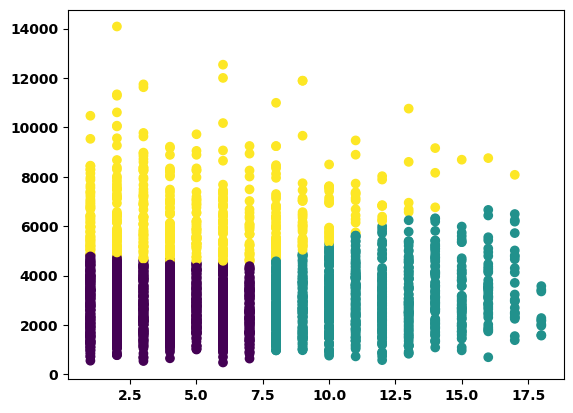

In [71]:
plt.scatter(df['ORDERLINENUMBER'], df['SALES'],c=df['Cluster'])

In [61]:
# The above scatter plot shows the distribution of Clusters